In [1]:
from pyGDM2 import structures
from pyGDM2 import materials
from pyGDM2 import fields

from pyGDM2 import core
from pyGDM2 import propagators
from pyGDM2 import tools
from pyGDM2 import linear
from pyGDM2 import visu

import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np

# Function to generate hexagon mesh points
def generate_hexagon(side_length):
    points = []
    points.append((0, 0, 0))  # Center point
    for i in range(7):
        if i > 0:
            angle = np.pi / 3 * i
            x = side_length * np.cos(angle)
            y = side_length * np.sin(angle)
            points.append((x, y, 0))
            points.append( ((x + p1[0])/2, (y + p1[1])/2, 0) )
            points.append((x/2, y/2, 0))
            p1 = (x, y, 0)
        else:
            angle = np.pi / 3 * i
            x = side_length * np.cos(angle)
            y = side_length * np.sin(angle)
            points.append((x, y, 0))
            points.append((x/2, y/2, 0))
            p1 = (x, y, 0)
    return np.array(points)

def Make_L(
        length=100,
        width=100,
        cut_l = 100,
        cut_r = 0,
        cut_up = 0,
        step=5,
        H=4,
        left = True
):

    full_geo = structures.rect_wire(step, L=int(length/step), W=int(width/step), H=H)
    full_geo = full_geo[np.logical_not(np.logical_and(np.logical_and(
                    full_geo.T[0]>cut_r,
                    full_geo.T[0]<=cut_l),
                    full_geo.T[1]<=cut_up) )]
    
    if left:
        full_geo.T[0] = full_geo.T[0]*-1

    #m = getattr(Epsilon_ExpClass, material)()
    #struct = structures.struct(step, full_geo, m)

    return full_geo

In [3]:
L = Make_L(9,18,10,0,0,3,1)
L[:,2] = 0

In [4]:
H = generate_hexagon(6)

In [5]:
with open("Structures/Hex.xyz", "w") as f:
    f.write(f"{len(H)}\n")
    f.write("Hexagon\n")
    for i in range(len(H)):
        f.write(f"Au {H[i][0]} {H[i][1]} {H[i][2]}\n")

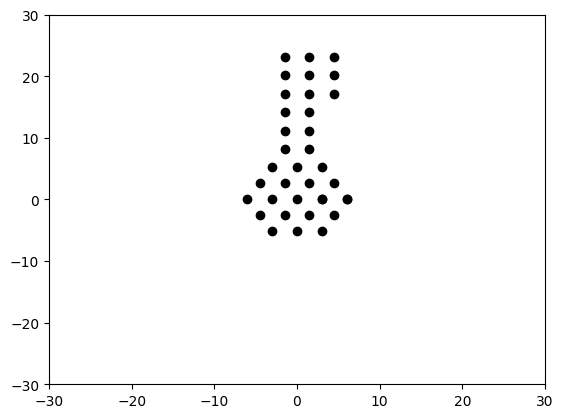

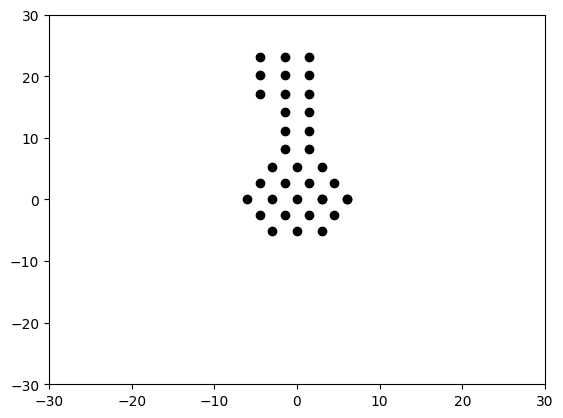

In [6]:
top_of_H = np.max(H[:, 1])

bottom_of_L = np.min(L[:, 1])

L_shifted = L.copy()
L_shifted[:, 1] += (top_of_H - bottom_of_L) + 3
L_shifted[:, 0] -= 1.5

with open("Structures/Gamm_1_L.xyz", "w") as f:
    f.write(f"{len(L_shifted) + len(H)}\n")
    f.write("\n")
    for i in range(len(H)):
        f.write(f"Au {H[i][0]} {H[i][1]} {H[i][2]}\n")
    for i in range(len(L_shifted)):
        f.write(f"Au {L_shifted[i][0]} {L_shifted[i][1]} {L_shifted[i][2]}\n")

L_mirror = L_shifted.copy()
L_mirror[:, 0] = -L_mirror[:, 0]

with open("Structures/Gamm_1_R.xyz", "w") as f:
    f.write(f"{len(L_mirror) + len(H)}\n")
    f.write("\n")
    for i in range(len(H)):
        f.write(f"Au {H[i][0]} {H[i][1]} {H[i][2]}\n")
    for i in range(len(L_mirror)):
        f.write(f"Au {L_mirror[i][0]} {L_mirror[i][1]} {L_mirror[i][2]}\n")

plt.scatter(H[:, 0], H[:, 1], label='H', color='k')
plt.scatter(L_mirror[:, 0], L_mirror[:, 1], color='k', )

plt.xlim(-30, 30)
plt.ylim(-30, 30)
plt.show()

plt.scatter(H[:, 0], H[:, 1], label='H', color='k')
plt.scatter(L_shifted[:, 0], L_shifted[:, 1], color='k')

plt.xlim(-30, 30)
plt.ylim(-30, 30)
plt.show()

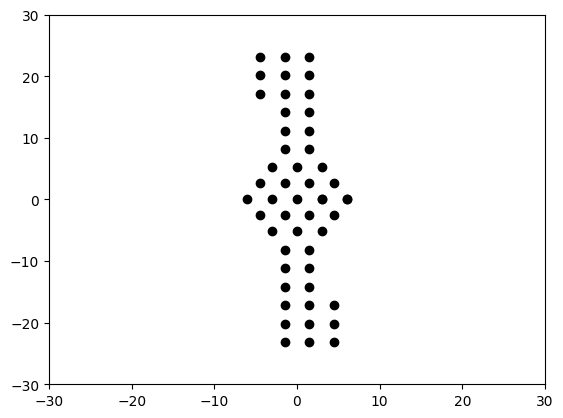

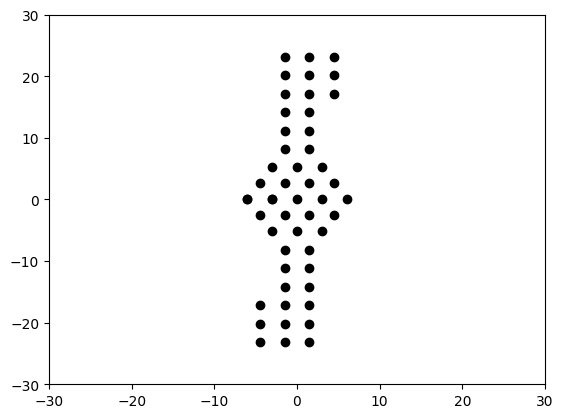

In [7]:
top_of_H = np.max(H[:, 1])
bottom_of_H = np.min(H[:, 1])

top_of_L = np.max(L[:, 1])
bottom_of_L = np.min(L[:, 1])

L_shifted_up = L.copy()
L_shifted_up[:, 1] += (top_of_H - bottom_of_L) + 3
L_shifted_up[:, 0] -= 1.5

L_shifted_down = L.copy()
L_shifted_down = np.dot(L_shifted_down, [[-1, 0, 0], [0, -1, 0], [0, 0, 1]])
L_shifted_down[:, 1] -= (top_of_H - bottom_of_L) + 3
L_shifted_down[:, 0] += 1.5

with open("Structures/Gamm_2_L.xyz", "w") as f:
    f.write(f"{len(L_shifted_up) + len(H) + len(L_shifted_down)}\n")
    f.write("\n")
    for i in range(len(H)):
        f.write(f"Au {H[i][0]} {H[i][1]} {H[i][2]}\n")
    for i in range(len(L_shifted_up)):
        f.write(f"Au {L_shifted_up[i][0]} {L_shifted_up[i][1]} {L_shifted_up[i][2]}\n")
    for i in range(len(L_shifted_down)):
        f.write(f"Au {L_shifted_down[i][0]} {L_shifted_down[i][1]} {L_shifted_down[i][2]}\n")

plt.scatter(H[:, 0], H[:, 1], color = 'k')
plt.scatter(L_shifted_up[:, 0], L_shifted_up[:, 1], color = 'k')
plt.scatter(L_shifted_down[:, 0], L_shifted_down[:, 1], color = 'k')
plt.xlim(-30, 30)
plt.ylim(-30, 30)
plt.show()


# Mirror image of all points in x = 0
H_mirror = H.copy()
H_mirror[:, 0] = -H_mirror[:, 0]

L_shifted_up_mirror = L_shifted_up.copy()
L_shifted_up_mirror[:, 0] = -L_shifted_up_mirror[:, 0]

L_shifted_down_mirror = L_shifted_down.copy()
L_shifted_down_mirror[:, 0] = -L_shifted_down_mirror[:, 0]

with open("Structures/Gamm_2_R.xyz", "w") as f:
    f.write(f"{len(L_shifted_up) + len(H) + len(L_shifted_down)}\n")
    f.write("L_shifted_up\n")
    for i in range(len(H)):
        f.write(f"Au {H[i][0]} {H[i][1]} {H[i][2]}\n")
    for i in range(len(L_shifted_up_mirror)):
        f.write(f"Au {L_shifted_up_mirror[i][0]} {L_shifted_up_mirror[i][1]} {L_shifted_up_mirror[i][2]}\n")
    for i in range(len(L_shifted_down_mirror)):
        f.write(f"Au {L_shifted_down_mirror[i][0]} {L_shifted_down_mirror[i][1]} {L_shifted_down_mirror[i][2]}\n")

# Plot the mirrored points
plt.scatter(H_mirror[:, 0], H_mirror[:, 1], color='k')
plt.scatter(L_shifted_up_mirror[:, 0], L_shifted_up_mirror[:, 1], color='k')
plt.scatter(L_shifted_down_mirror[:, 0], L_shifted_down_mirror[:, 1], color='k')
plt.xlim(-30, 30)
plt.ylim(-30, 30)
plt.show()

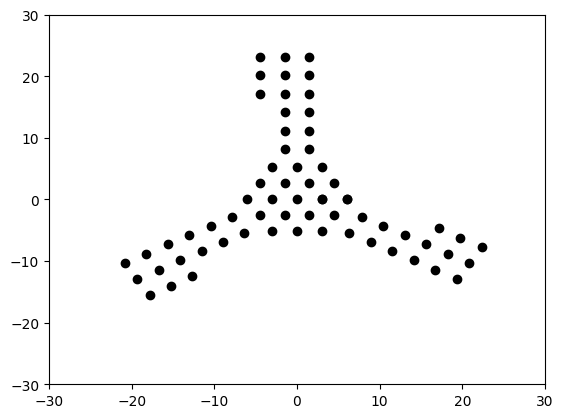

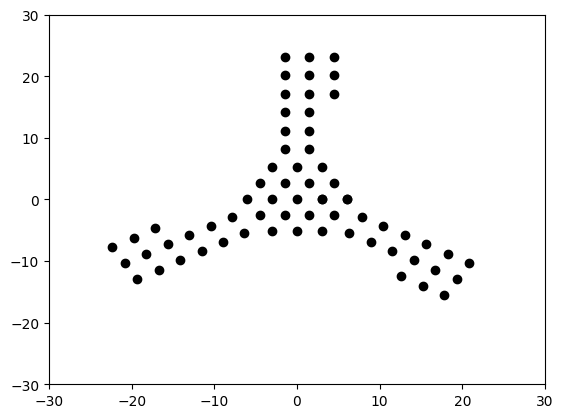

In [8]:
top_of_H = np.max(H[:, 1])
bottom_of_H = np.min(H[:, 1])

top_of_L = np.max(L[:, 1])
bottom_of_L = np.min(L[:, 1])

L_shifted_up = L.copy()
L_shifted_up[:, 1] += (top_of_H - bottom_of_L) + 3
L_shifted_up[:, 0] -= 1.5

# Rotate L by 120 degrees
rotation_matrix_120 = np.array([[np.cos(2 * np.pi / 3), -np.sin(2 * np.pi / 3), 0],
                                [np.sin(2 * np.pi / 3), np.cos(2 * np.pi / 3), 0],
                                [0, 0, 1]])
L_rotated_120 = np.dot(L, rotation_matrix_120.T)

# Rotate L by 240 degrees
rotation_matrix_240 = np.array([[np.cos(4 * np.pi / 3), -np.sin(4 * np.pi / 3), 0],
                                [np.sin(4 * np.pi / 3), np.cos(4 * np.pi / 3), 0],
                                [0, 0, 1]])

L_rotated_240 = np.dot(L_shifted_up, rotation_matrix_120.T)

L_rotated_120 = np.dot(L_shifted_up, rotation_matrix_240.T)

with open("Structures/Gamm_3_L.xyz", "w") as f:
    f.write(f"{len(L_shifted_up) + len(H) + len(L_rotated_120) + len(L_rotated_240)}\n")
    f.write("\n")
    for i in range(len(H)):
        f.write(f"Au {H[i][0]} {H[i][1]} {H[i][2]}\n")
    for i in range(len(L_shifted_up)):
        f.write(f"Au {L_shifted_up[i][0]} {L_shifted_up[i][1]} {L_shifted_up[i][2]}\n")
    for i in range(len(L_rotated_120)):
        f.write(f"Au {L_rotated_120[i][0]} {L_rotated_120[i][1]} {L_rotated_120[i][2]}\n")
    for i in range(len(L_rotated_240)):
        f.write(f"Au {L_rotated_240[i][0]} {L_rotated_240[i][1]} {L_rotated_240[i][2]}\n")

plt.scatter(L_rotated_120[:, 0], L_rotated_120[:, 1], color='k')
plt.scatter(L_rotated_240[:, 0], L_rotated_240[:, 1], color='k')

plt.scatter(H[:, 0], H[:, 1], color = 'k')
plt.scatter(L_shifted_up[:, 0], L_shifted_up[:, 1], color = 'k')


plt.xlim(-30, 30)
plt.ylim(-30, 30)
plt.show()
L_reflected = L_shifted_up.copy()
L_reflected[:, 0] = -L_reflected[:, 0]

L_rotated_120_reflected = L_rotated_120.copy()
L_rotated_120_reflected[:, 0] = -L_rotated_120_reflected[:, 0]

L_rotated_240_reflected = L_rotated_240.copy()
L_rotated_240_reflected[:, 0] = -L_rotated_240_reflected[:, 0]

with open("Structures/Gamm_3_R.xyz", "w") as f:
    f.write(f"{len(L_shifted_up) + len(H) + len(L_rotated_120) + len(L_rotated_240)}\n")
    f.write("\n")
    for i in range(len(H)):
        f.write(f"Au {H[i][0]} {H[i][1]} {H[i][2]}\n")
    for i in range(len(L_reflected)):
        f.write(f"Au {L_reflected[i][0]} {L_reflected[i][1]} {L_reflected[i][2]}\n")
    for i in range(len(L_rotated_120_reflected)):
        f.write(f"Au {L_rotated_120_reflected[i][0]} {L_rotated_120_reflected[i][1]} {L_rotated_120_reflected[i][2]}\n")
    for i in range(len(L_rotated_240_reflected)):
        f.write(f"Au {L_rotated_240_reflected[i][0]} {L_rotated_240_reflected[i][1]} {L_rotated_240_reflected[i][2]}\n")

plt.scatter(L_reflected[:, 0], L_reflected[:, 1], color='k',)
plt.scatter(L_rotated_120_reflected[:, 0], L_rotated_120_reflected[:, 1], color='k',)
plt.scatter(L_rotated_240_reflected[:, 0], L_rotated_240_reflected[:, 1], color='k', )

plt.scatter(H[:, 0], H[:, 1], color='k', )
plt.xlim(-30, 30)
plt.ylim(-30, 30)
plt.show()

